In [71]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_wine


In [20]:
tdf = pd.read_csv("data/ml/titanic.csv")
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
tdf.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns', inplace=True)
tdf.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [25]:
#Create target and inout dataframes
target = tdf.Survived
print(type(target))
inputs = tdf.drop(['Survived'],axis='columns')
print(type(inputs))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [26]:
#Replace Sex with dummy variables
dummies = pd.get_dummies(inputs.Sex)
inputs = pd.concat([inputs,dummies], axis='columns')
inputs.drop(['Sex'],axis='columns',inplace=True)
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [28]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [30]:
inputs[inputs.Age.isna()]

,Pclass,Age,Fare,female,male
5,3,NaN,8.4583,0,1
17,2,NaN,13.0000,0,1
19,3,NaN,7.2250,1,0
26,3,NaN,7.2250,0,1
28,3,NaN,7.8792,1,0
...,...,...,...,...,...
859,3,NaN,7.2292,0,1
863,3,NaN,69.5500,1,0
868,3,NaN,9.5000,0,1
878,3,NaN,7.8958,0,1


In [33]:
inputs.Age.fillna(inputs.Age.mean(),inplace=True)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2,random_state=32)

In [39]:
print("X_train len = {}, X_test len = {}",len(X_train), len(X_test))

X_train len = {}, X_test len = {} 712 179


In [41]:
X_test[:10]

,Pclass,Age,Fare,female,male
837,3,29.699118,8.0500,0,1
334,1,29.699118,133.6500,1,0
849,1,29.699118,89.1042,1,0
778,3,29.699118,7.7375,0,1
413,2,29.699118,0.0000,0,1
151,1,22.000000,66.6000,1,0
826,3,29.699118,56.4958,0,1
282,3,16.000000,9.5000,0,1
881,3,33.000000,7.8958,0,1
848,2,28.000000,33.0000,0,1


In [42]:
y_test[:10]

837    0
334    1
849    1
778    0
413    0
151    1
826    0
282    0
881    0
848    0
Name: Survived, dtype: int64

In [43]:
nbm = GaussianNB()
nbm.fit(X_train, y_train)

GaussianNB()

In [44]:
nbm.score(X_test,y_test)

0.7877094972067039

In [45]:
nbm.predict(X_test[:10])

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [50]:
#Spam/Ham email Detection
sdf = pd.read_csv("data/ml/spam.csv")
sdf.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
sdf.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [53]:
sdf['spam'] = sdf.Category.apply(lambda x: 1 if x=="spam" else 0)
sdf

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(sdf.Message,sdf.spam,test_size=0.25)

In [60]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
print(X_train_count.shape)
X_train_count.toarray()

(4179, 7434)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [61]:
mbm = MultinomialNB()
mbm.fit(X_train_count, y_train)

MultinomialNB()

In [62]:
X_test_count = v.transform(X_test)
mbm.score(X_test_count,y_test)

0.9806173725771715

In [63]:
emails = [
    "hey there ill see you at the coffee shop at 7 AM for the run",
    "Exclusive sale 20 percent discount"
]

emails_count = v.transform(emails)
mbm.predict(emails_count)

array([0, 1])

In [66]:
#Perform the same steps using SKlearn pipeline

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [67]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9806173725771715

In [68]:
clf.predict(X_test[:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [69]:
y_test[:10]

2628    0
3841    0
2382    0
2062    0
4070    0
2900    0
5401    0
83      0
1467    0
420     1
Name: spam, dtype: int64

In [70]:
clf.predict(emails)

array([0, 1])

In [77]:
#Wine Data Set
wines = load_wine()
wdf = pd.DataFrame(data = wines.data, columns=wines.feature_names)
dir(wines)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [78]:
wdf.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [79]:
wines.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [80]:
wines.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [82]:
wdf.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [86]:
wdf['target'] = wines.target
wdf.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

<AxesSubplot:>

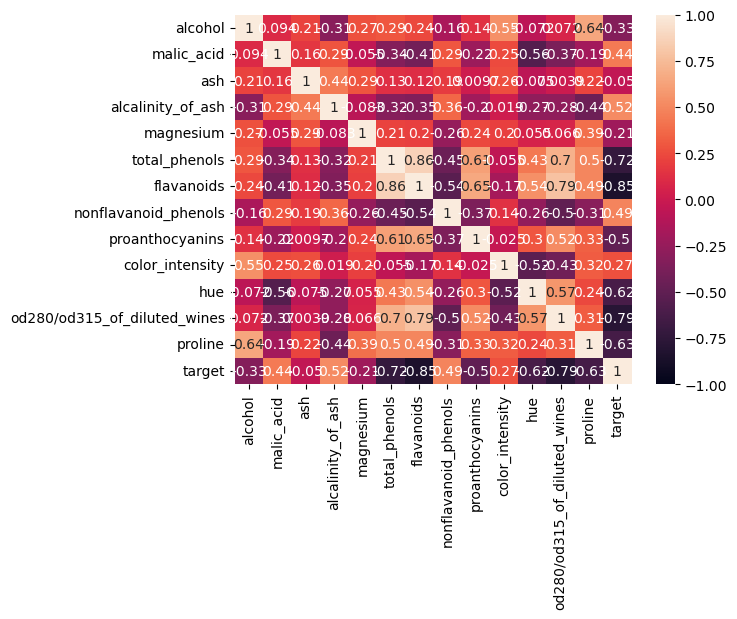

In [88]:
sns.heatmap(wdf.corr(),vmax=1,vmin=-1,annot=True)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(wines.data, wines.target, test_size=0.3, random_state=100)

In [91]:
nb2 = GaussianNB()
nb2.fit(X_train, y_train)
nb2.score(X_test, y_test)

1.0

In [92]:
nb2 = MultinomialNB()
nb2.fit(X_train, y_train)
nb2.score(X_test, y_test)

0.7777777777777778